# Sales Analysis : Yearly Sales Data

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Listing all the Datasets in directory

In [2]:
files = [file for file in os.listdir(r'C:\Users\HP\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


### Creating an empty Dataframe to merge all available Datasets

In [3]:
df = pd.DataFrame()

for file in files:
    temp_df = pd.read_csv(r'C:\Users\HP\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\'+file)
    df = pd.concat([df,temp_df])

df.to_csv('all_months_sales_data.csv')

In [4]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.shape

(186846, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186846 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186301 non-null  object
 1   Product           186301 non-null  object
 2   Quantity Ordered  186301 non-null  object
 3   Price Each        186301 non-null  object
 4   Order Date        186301 non-null  object
 5   Purchase Address  186301 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186301,186301,186301,186301,186301,186301
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,351,21903,168552,21903,351,351


### Anomaly Detection

### Handling NULL values

In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

We can see some records are NaN so we can delete them entirely

In [9]:
df[df['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna(inplace = True)

df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Handling inconsistent data

While looking at the data found some redundancy so we can directly remove this records from the DataFrame

In [11]:
df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
df = df[df['Order Date'].str[0:2] != 'Or']

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [13]:
df[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Now data is clean !!!

### Now lets convert numeric values, date values to their respective data type!

In [14]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

df['Order Date'] = pd.to_datetime(df['Order Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.2+ MB


### Lets add a new column at the end indicating the Total Price = Quantity Ordered * Price Each

In [15]:
df['Total_Price'] = df['Quantity Ordered'] * df['Price Each']

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


### Some Questions & Answers

### 1. What was the best Month for sale and How much was earned that Month ?
To solve this question we need the month and we can get the month using 'Order Date' column

In [16]:
df['Month'] = df['Order Date'].dt.month

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9


Now we can group by month to get our required output

#### From this plot we can clearly see the Highest Sale month is December!

<AxesSubplot:xlabel='Month'>

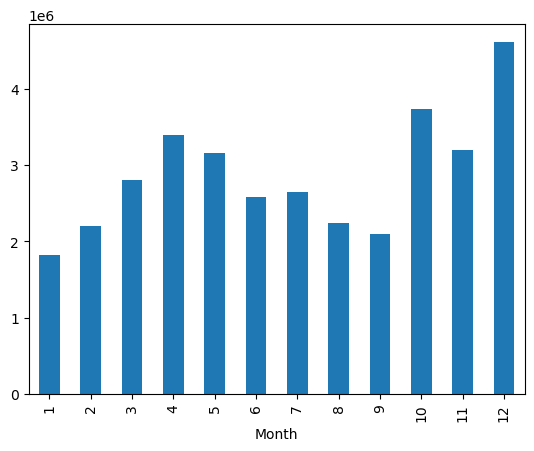

In [17]:
df.groupby('Month')['Total_Price'].sum().plot(kind='bar')

### 2. Find out the Uniqe states from the data.

In [18]:
df['Purchase Address'] = df['Purchase Address'].astype(str)

In order to extract the State lets go one by one.

In [19]:
s = '917 1st St, Dallas, TX 75001'

# Here we first need to split between ','

s.split(',')

['917 1st St', ' Dallas', ' TX 75001']

In [20]:
# Now from above list we need the last one i.e 2nd indexed element.

s.split(',')[2]

' TX 75001'

In [21]:
# Now we need to again split but this time based on space => ' '

s.split(',')[2].split(' ')

['', 'TX', '75001']

In [22]:
# Finally the 1st indexed element in this list is our Final Answer!

s.split(',')[2].split(' ')

['', 'TX', '75001']

Now lets apply same logic in our dataframe column and adding nunique to get rid of dupes.

In [23]:
unique_states = df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1].unique()

unique_states

array(['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME'], dtype=object)

### 3. Find out the Uniqe cities from the data.

Will follow the same approach this time also but here in different states there might be same named cities so we need to check that as well

So we will add City + State in Order to increase our accuracy.

In [24]:
df['Purchase Address'].str.split(',').str[1].str.strip(' ')

0               Dallas
2               Boston
3          Los Angeles
4          Los Angeles
5          Los Angeles
             ...      
11681      Los Angeles
11682    San Francisco
11683    San Francisco
11684    San Francisco
11685    San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [25]:
df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]

0        TX
2        MA
3        CA
4        CA
5        CA
         ..
11681    CA
11682    CA
11683    CA
11684    CA
11685    CA
Name: Purchase Address, Length: 185950, dtype: object

In [26]:
new_city = df['Purchase Address'].str.split(',').str[1].str.strip(' ') + ' (' +  df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]    + ')'   

new_city.unique()

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

### Now we can see that there are 2 cities named Portland but under different states.

### 4. Find out the most ordered product from the data.

In [27]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

### 5. What is the maximum cost of the product that was sold?

In [28]:
df.nlargest(1,'Price Each')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Price,Month
9,176565,Macbook Pro Laptop,1,1700.0,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.0,4


### 6. What are the Peak Order hours? 

In [29]:
df['Hours'] = df['Order Date'].dt.hour

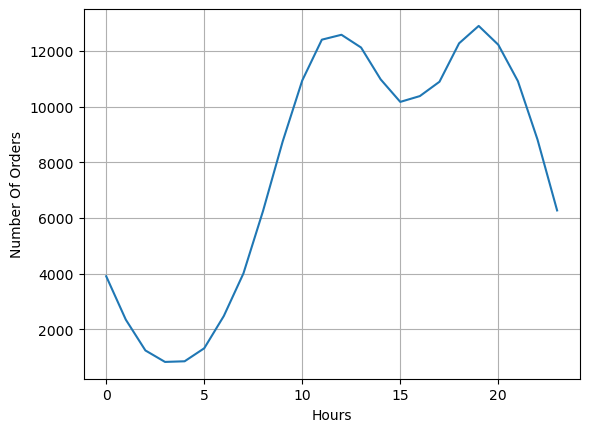

In [30]:
df.groupby('Hours')['Total_Price'].count().plot()
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
plt.grid()

Hence from above plot we can say that the Peak Order Hours are from 10:00AM 12:00PM & 6:00PM - 8:00PM

# This concludes the Analysis on the Sales Data.

# Thank you!